<h1>Micro-Credit Defaulter Model</h1>

<img src='https://ideas4development.org/uploads/2017/11/9914820-Background-concept-wordcloud-illustration-of-microfinance-glowing-light-Stock-Illustration.jpg' width=500>

***First importing necessary libraries***

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()
import warnings
warnings.filterwarnings("ignore")

***Importing data which is in csv format***

In [2]:
df=pd.read_csv('Microcredit.csv')
df.head()

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,20-07-2016
1,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,10-08-2016
2,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,19-08-2016
3,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,06-06-2016
4,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,22-06-2016


<img src='https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcScDjoZocFJ5IrpOAw7MedCjsYJspHsfqSdIA&usqp=CAU'>

<h2>Start of EDA process</h2>

***Checking shape of the Dataset***

In [3]:
df.shape

(209593, 36)

We see that dataset contains **209593 rows** and **36 columns** out of which **Label** column is the **output variable** and rest **36** columns are the **input attributes**

***Checking for Null values***

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 36 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 209593 non-null  int64  
 1   msisdn                209593 non-null  object 
 2   aon                   209593 non-null  float64
 3   daily_decr30          209593 non-null  float64
 4   daily_decr90          209593 non-null  float64
 5   rental30              209593 non-null  float64
 6   rental90              209593 non-null  float64
 7   last_rech_date_ma     209593 non-null  float64
 8   last_rech_date_da     209593 non-null  float64
 9   last_rech_amt_ma      209593 non-null  int64  
 10  cnt_ma_rech30         209593 non-null  int64  
 11  fr_ma_rech30          209593 non-null  float64
 12  sumamnt_ma_rech30     209593 non-null  float64
 13  medianamnt_ma_rech30  209593 non-null  float64
 14  medianmarechprebal30  209593 non-null  float64
 15  

In [5]:
df.isnull().sum()

label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

We can see that there is no null values in the dataset, so we don't have to worry about it

msisdn is just a mobile number of the user, it will not give us any other information or help us in our prediction,its same with date as well. Hence, we are going to drop these columns

In [6]:
df.drop(['msisdn','pdate'],axis=1,inplace=True)
df.head()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,...,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,...,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,...,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW
3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,...,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,...,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW


In [7]:
df['label'].value_counts()

1    183431
0     26162
Name: label, dtype: int64

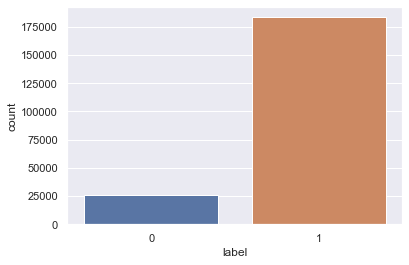

In [8]:
sns.countplot(df['label'])

We can see that the data is imbalanced

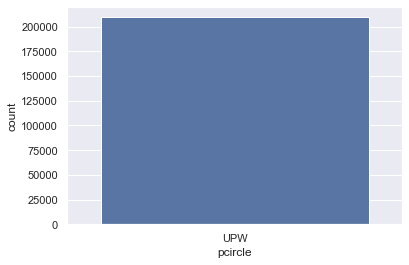

In [9]:
sns.countplot(df['pcircle'])

The data in this complete column is same, i.e UPW,  it will not give us any other information or help us in our prediction. Hence, we are going to drop this column

In [10]:
df.drop(['pcircle'],axis=1,inplace=True)
df.head()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,...,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,...,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,...,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000
3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,...,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,...,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333


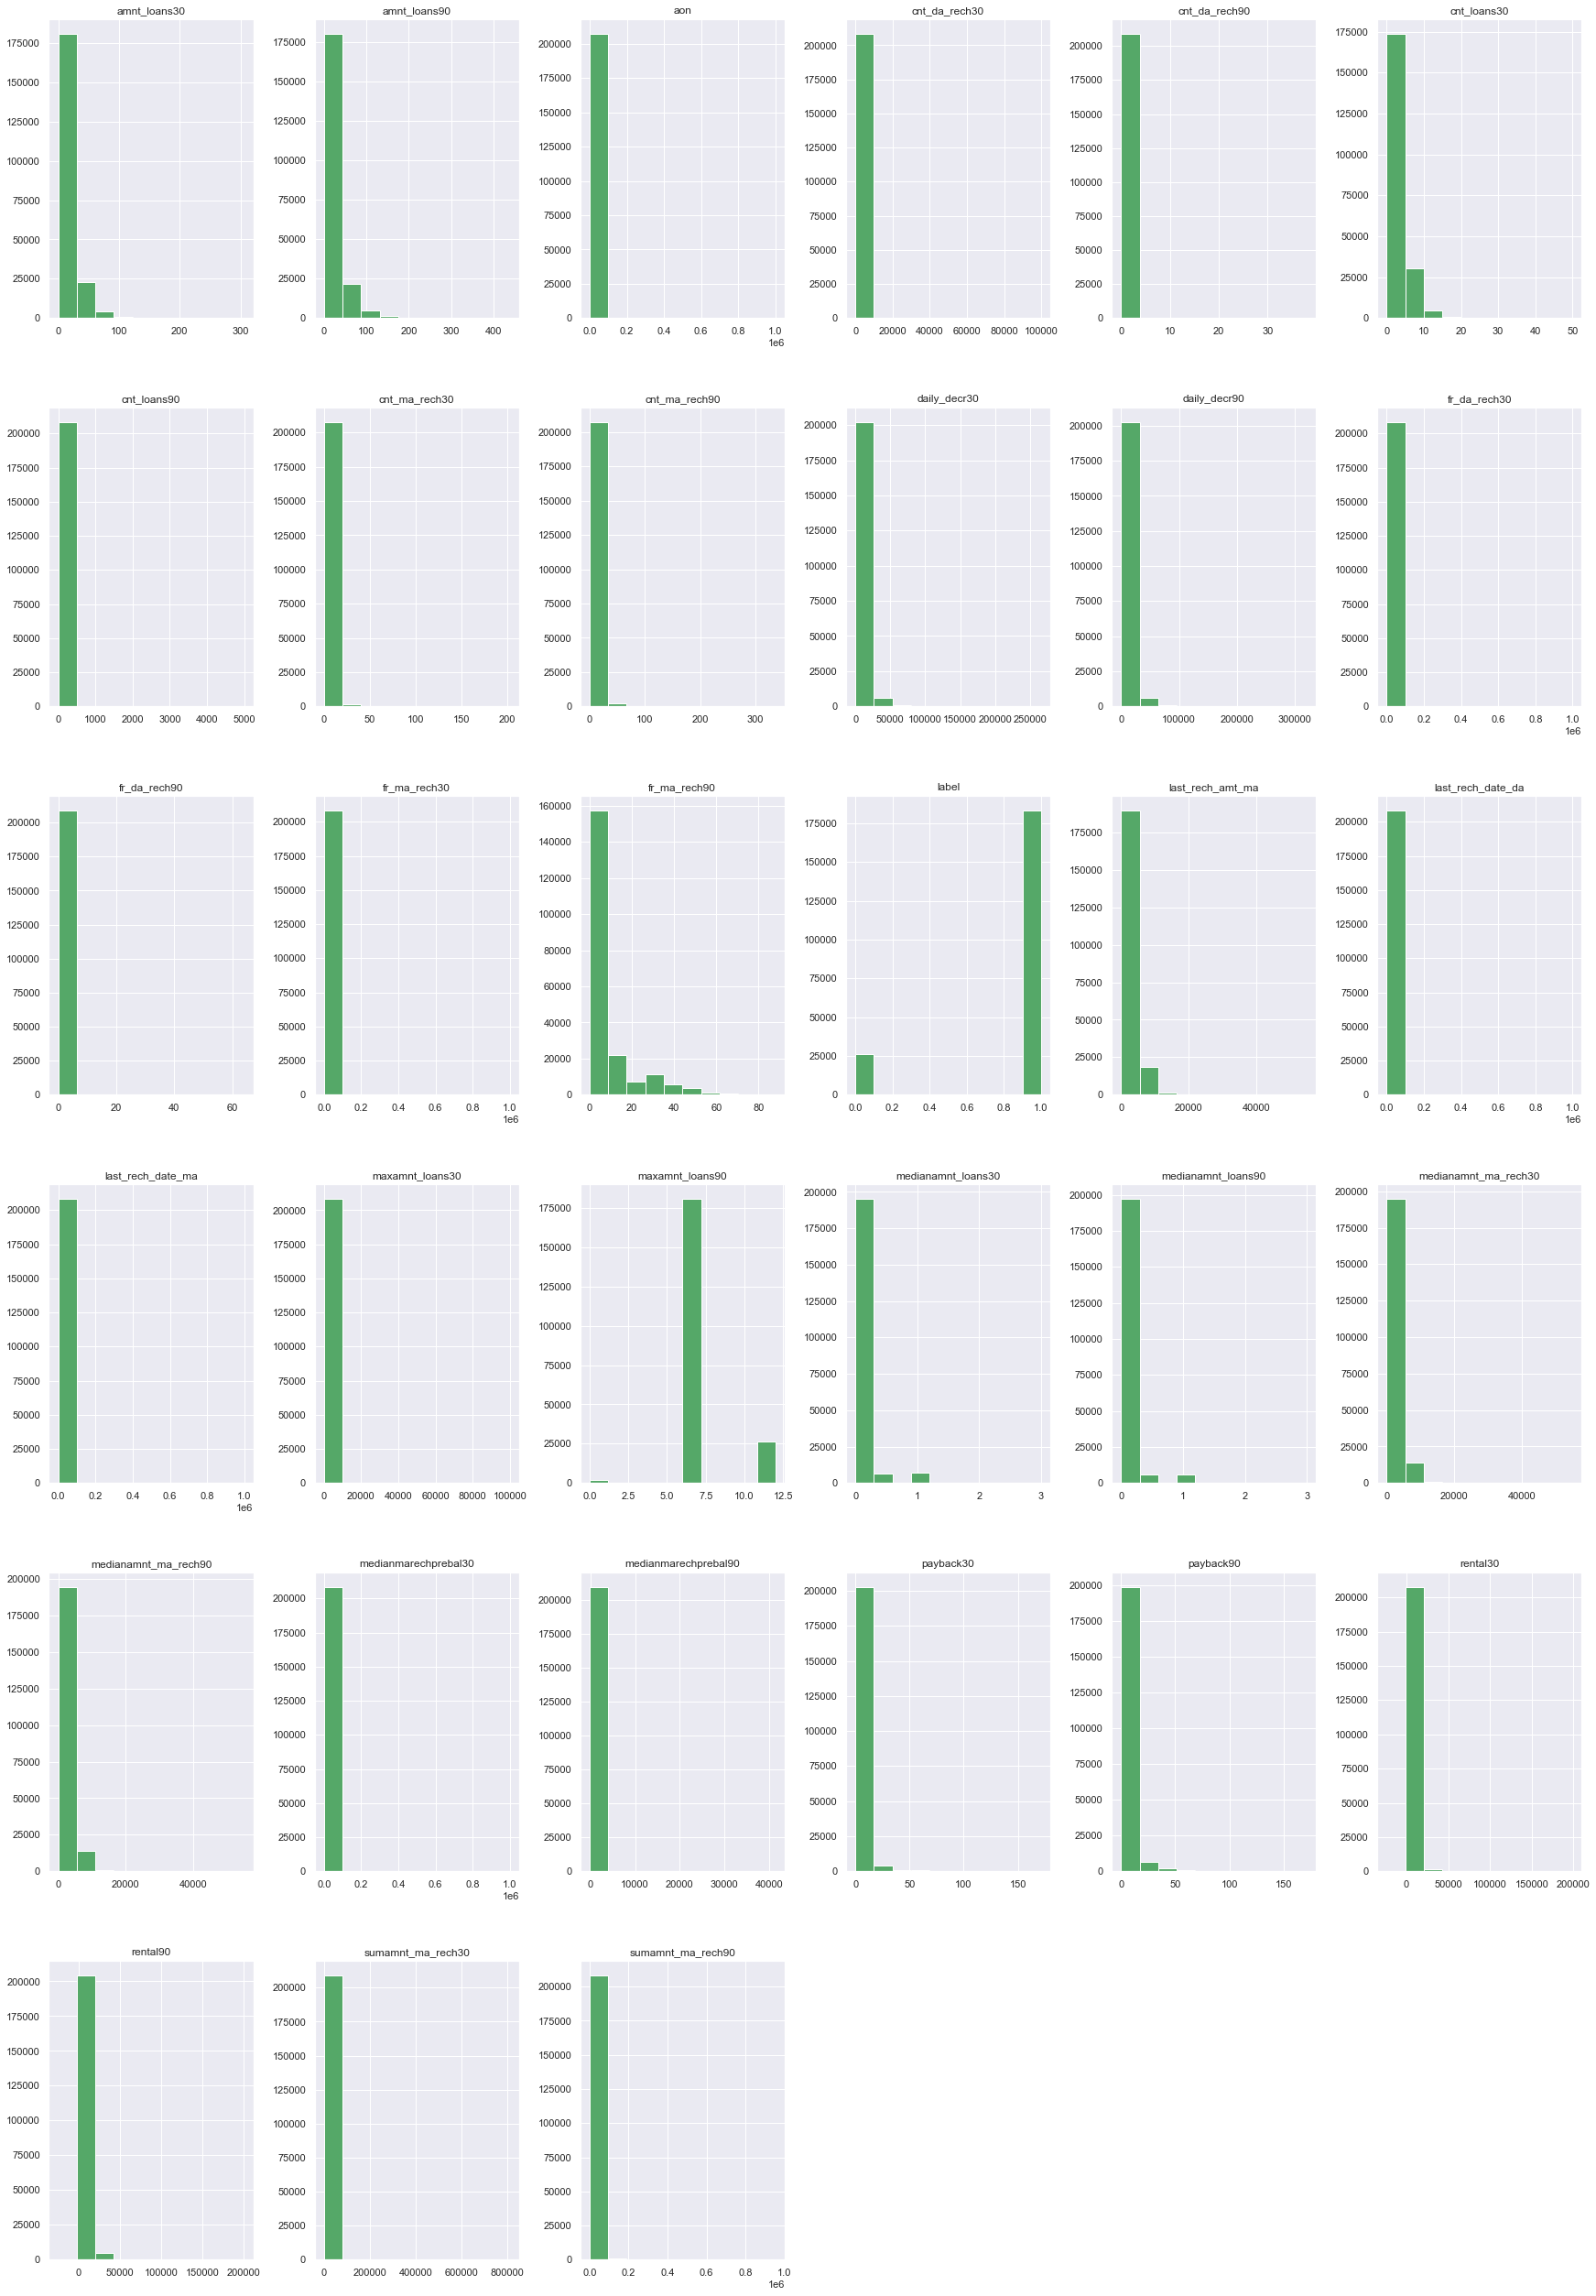

In [11]:
df.hist(figsize=(30,45),color='g')
plt.show()

AxesSubplot(0.125,0.125;0.775x0.755)


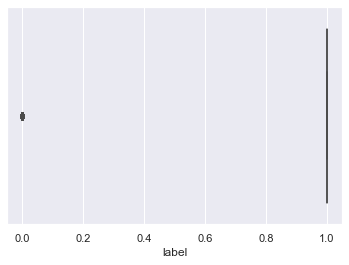

AxesSubplot(0.125,0.125;0.775x0.755)


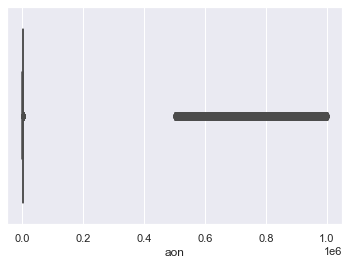

AxesSubplot(0.125,0.125;0.775x0.755)


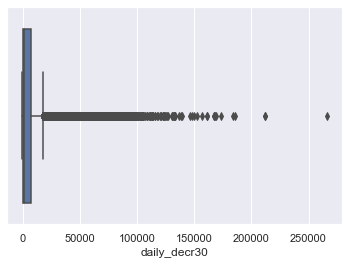

AxesSubplot(0.125,0.125;0.775x0.755)


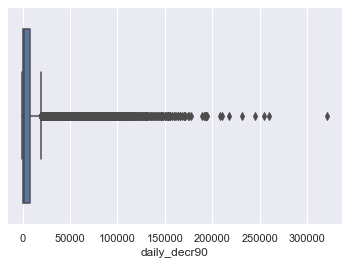

AxesSubplot(0.125,0.125;0.775x0.755)


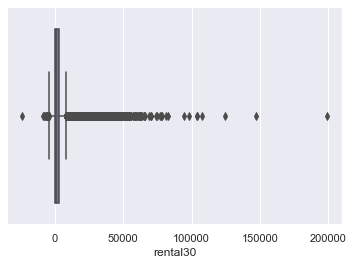

AxesSubplot(0.125,0.125;0.775x0.755)


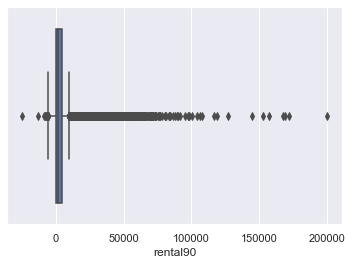

AxesSubplot(0.125,0.125;0.775x0.755)


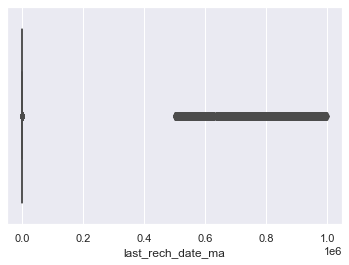

AxesSubplot(0.125,0.125;0.775x0.755)


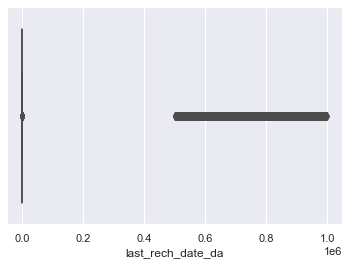

AxesSubplot(0.125,0.125;0.775x0.755)


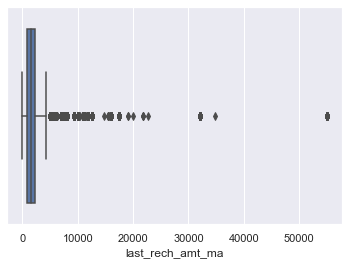

AxesSubplot(0.125,0.125;0.775x0.755)


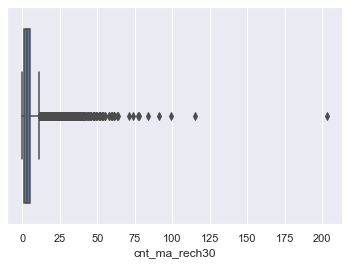

AxesSubplot(0.125,0.125;0.775x0.755)


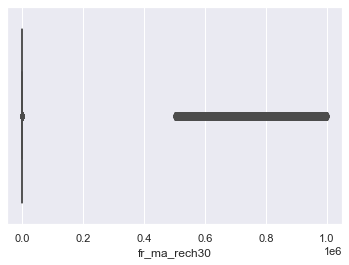

AxesSubplot(0.125,0.125;0.775x0.755)


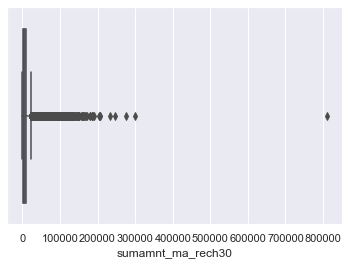

AxesSubplot(0.125,0.125;0.775x0.755)


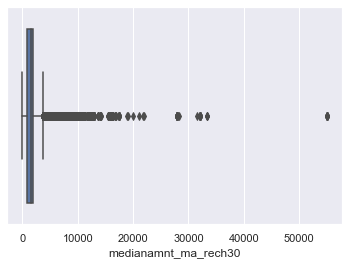

AxesSubplot(0.125,0.125;0.775x0.755)


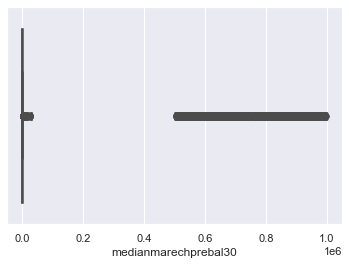

AxesSubplot(0.125,0.125;0.775x0.755)


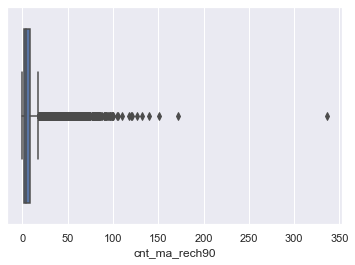

AxesSubplot(0.125,0.125;0.775x0.755)


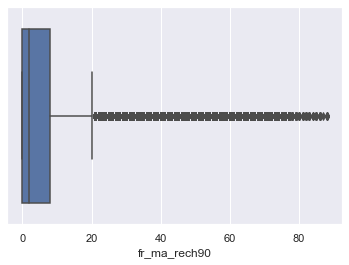

AxesSubplot(0.125,0.125;0.775x0.755)


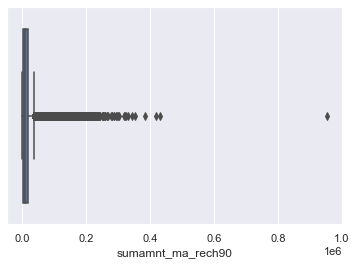

AxesSubplot(0.125,0.125;0.775x0.755)


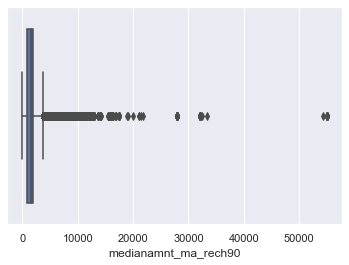

AxesSubplot(0.125,0.125;0.775x0.755)


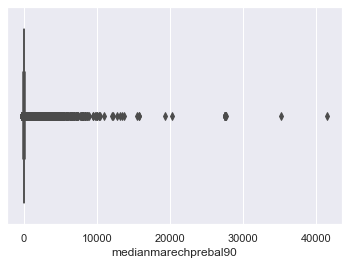

AxesSubplot(0.125,0.125;0.775x0.755)


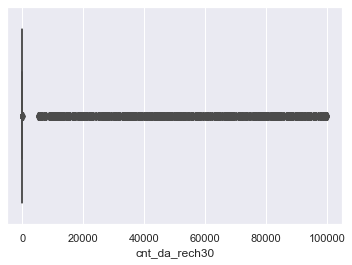

AxesSubplot(0.125,0.125;0.775x0.755)


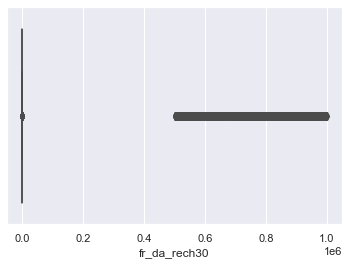

AxesSubplot(0.125,0.125;0.775x0.755)


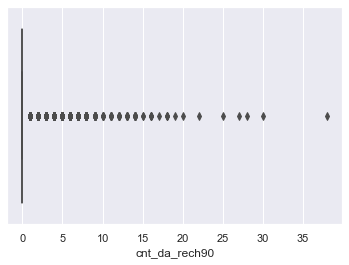

AxesSubplot(0.125,0.125;0.775x0.755)


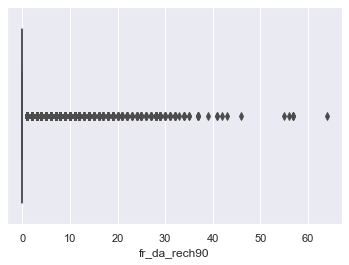

AxesSubplot(0.125,0.125;0.775x0.755)


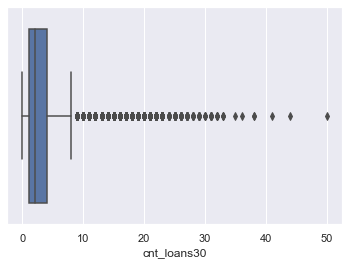

AxesSubplot(0.125,0.125;0.775x0.755)


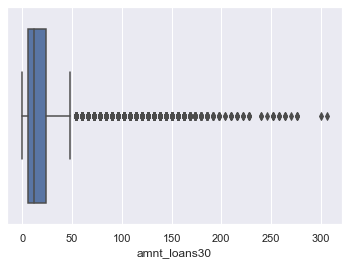

AxesSubplot(0.125,0.125;0.775x0.755)


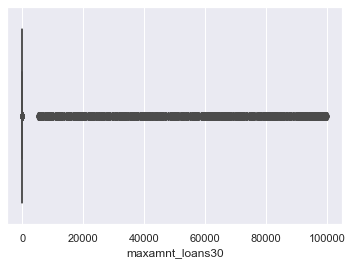

AxesSubplot(0.125,0.125;0.775x0.755)


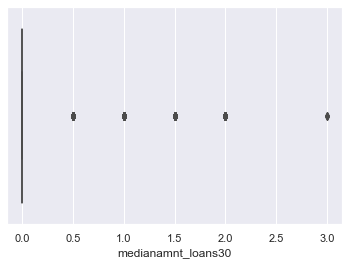

AxesSubplot(0.125,0.125;0.775x0.755)


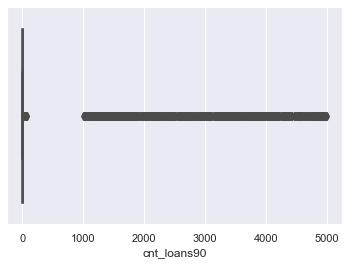

AxesSubplot(0.125,0.125;0.775x0.755)


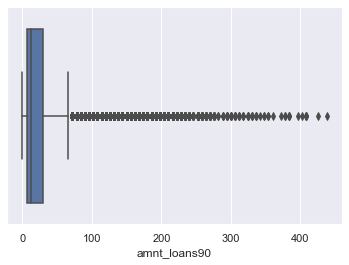

AxesSubplot(0.125,0.125;0.775x0.755)


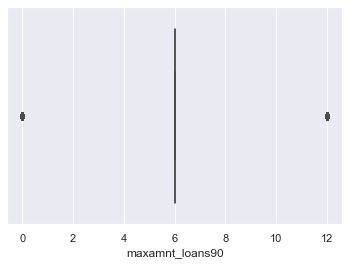

AxesSubplot(0.125,0.125;0.775x0.755)


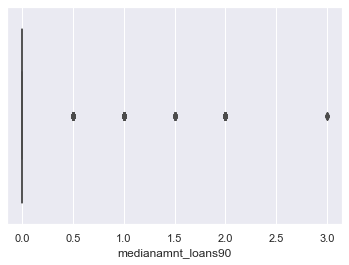

AxesSubplot(0.125,0.125;0.775x0.755)


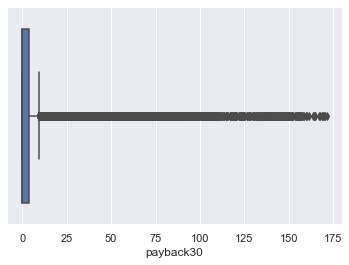

AxesSubplot(0.125,0.125;0.775x0.755)


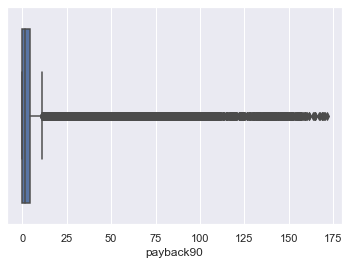

In [12]:
for i in df.columns:
    print(sns.boxplot(df[i]))
    plt.show()

We can see visually that there are multiple dots outside the plot which are indicating outliers

*Now, we will remove these outliers using below code*

In [13]:
from scipy.stats import zscore
import numpy as np
z = np.abs(zscore(df))
print('The shape of the dataset before removing outliers is',df.shape)
df_z = df[(z < 3).all(axis=1)]
print('The shape of the dataset after removing outliers is',df_z.shape)
df=df_z

The shape of the dataset before removing outliers is (209593, 33)
The shape of the dataset after removing outliers is (161465, 33)


***Now lets see how each column is dependent on the output variable W.***

In [14]:
df.corr()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
label,1.000000,0.086376,0.191662,0.192073,0.048945,0.069545,-0.095769,0.026123,0.159589,0.292492,...,0.238983,0.244307,0.002689,0.040130,0.244240,0.246878,0.088565,0.029620,0.142282,0.141053
aon,0.086376,1.000000,0.071687,0.073848,0.052519,0.057465,0.015165,-0.000733,0.081721,0.015264,...,0.049552,0.052399,0.002055,0.000348,0.082985,0.083288,0.029714,-0.004733,0.021474,0.041227
daily_decr30,0.191662,0.071687,1.000000,0.979246,0.445846,0.495649,-0.046021,0.058444,0.257911,0.396178,...,0.328738,0.420826,0.003933,0.010631,0.514988,0.570296,0.434206,-0.027961,0.148301,0.194491
daily_decr90,0.192073,0.073848,0.979246,1.000000,0.433199,0.504950,-0.040094,0.060433,0.247432,0.373330,...,0.303358,0.396451,0.003916,0.013181,0.517802,0.573994,0.436362,-0.028166,0.139665,0.190416
rental30,0.048945,0.052519,0.445846,0.433199,1.000000,0.950336,-0.017986,0.011158,0.089045,0.237642,...,0.183447,0.230621,0.004687,-0.002064,0.282042,0.310023,0.242881,-0.025504,0.147701,0.180398
rental90,0.069545,0.057465,0.495649,0.504950,0.950336,1.000000,-0.005881,0.019024,0.090056,0.233016,...,0.173975,0.229866,0.003907,0.000736,0.316953,0.349835,0.277055,-0.028455,0.150066,0.201048
last_rech_date_ma,-0.095769,0.015165,-0.046021,-0.040094,-0.017986,-0.005881,1.000000,0.025265,0.230253,-0.246814,...,-0.200247,-0.194832,-0.002617,-0.004465,-0.159731,-0.156904,-0.013813,-0.000904,-0.142428,-0.091799
last_rech_date_da,0.026123,-0.000733,0.058444,0.060433,0.011158,0.019024,0.025265,1.000000,0.020146,0.008973,...,0.000283,0.007187,-0.001800,0.002904,0.012100,0.016532,0.034832,-0.000534,0.003122,0.029857
last_rech_amt_ma,0.159589,0.081721,0.257911,0.247432,0.089045,0.090056,0.230253,0.020146,1.000000,0.021704,...,0.004386,0.036532,0.003791,0.036543,0.021263,0.043217,0.154227,0.032219,-0.014801,0.011451
cnt_ma_rech30,0.292492,0.015264,0.396178,0.373330,0.237642,0.233016,-0.246814,0.008973,0.021704,1.000000,...,0.726422,0.721342,0.001250,-0.011570,0.648824,0.645464,0.142909,-0.018617,0.216494,0.170299


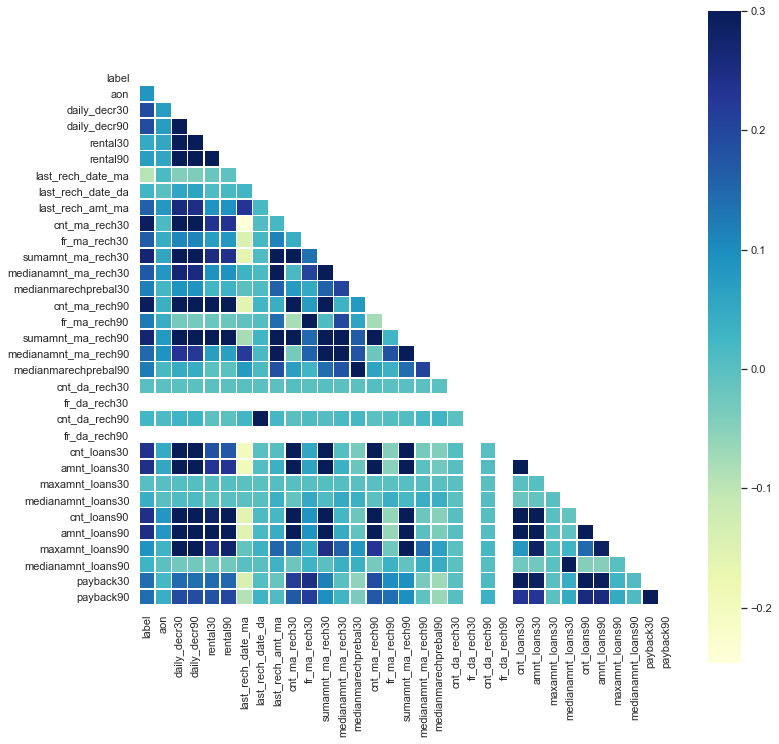

In [15]:
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(12, 12))
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True, linewidths=0.5,cmap="YlGnBu")

***Lets find out the columns that are not correlated with our output variable and which are not useful to us in any way***

In [16]:
df1=df.corr()
#since we only care about the correlation with our output, lets separate it
df2=df1.iloc[0:1,:]
np.abs(df2)

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
label,1.0,0.086376,0.191662,0.192073,0.048945,0.069545,0.095769,0.026123,0.159589,0.292492,...,0.238983,0.244307,0.002689,0.04013,0.24424,0.246878,0.088565,0.02962,0.142282,0.141053


If the value is 0 there is no correlation, if value is 1 they are highly correlated.

***Lets set our threshold value as 0.1 and drop columns with value less than this considering they are not correlated***

In [17]:
(np.abs(df2)<0.1).sum()

label                   0
aon                     1
daily_decr30            0
daily_decr90            0
rental30                1
rental90                1
last_rech_date_ma       1
last_rech_date_da       1
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           1
fr_da_rech30            0
cnt_da_rech90           1
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         1
medianamnt_loans30      1
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         1
medianamnt_loans90      1
payback30               0
payback90               0
dtype: int64

***Lets drop unnecessary columns***

In [18]:
df=df.drop(['aon','medianamnt_loans90','maxamnt_loans90','medianamnt_loans30','maxamnt_loans30','cnt_da_rech90','cnt_da_rech30','last_rech_date_da','rental30','rental90','last_rech_date_ma'],axis=1)

In [19]:
y=df[['label']]
y.head()

,label
0,0
1,1
2,1
3,1
4,1


In [20]:
x=df.drop(['label'],axis=1)
x.head()

,daily_decr30,daily_decr90,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,...,medianamnt_ma_rech90,medianmarechprebal90,fr_da_rech30,fr_da_rech90,cnt_loans30,amnt_loans30,cnt_loans90,amnt_loans90,payback30,payback90
0,3055.050000,3065.150000,1539,2,21.0,3078.0,1539.0,7.50,2,21,...,1539.0,7.50,0.0,0,2,12,2.0,12,29.000000,29.000000
1,12122.000000,12124.750000,5787,1,0.0,5787.0,5787.0,61.04,1,0,...,5787.0,61.04,0.0,0,1,12,1.0,12,0.000000,0.000000
2,1398.000000,1398.000000,1539,1,0.0,1539.0,1539.0,66.32,1,0,...,1539.0,66.32,0.0,0,1,6,1.0,6,0.000000,0.000000
3,21.228000,21.228000,947,0,0.0,0.0,0.0,0.00,1,0,...,947.0,2.50,0.0,0,2,12,2.0,12,0.000000,0.000000
4,150.619333,150.619333,2309,7,2.0,20029.0,2309.0,29.00,8,2,...,2888.0,35.00,0.0,0,7,42,7.0,42,2.333333,2.333333


In [21]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(x)

We have both of input and output attributes cleaned and in desired format

<h2>End of EDA Process</h2>

<img src='https://www.bankingfinance.in/wp-content/uploads/2017/10/Microcredit.jpg'>

Lets start Building models to make predictions and find the model that works best on our dataset

<h2>Start of Machine Learning Process</h2>

Since out target variable is Bivariant, we are going to do classification analysis

***Lets import required packages***

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,ExtraTreesClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc

In [23]:
KNN=KNeighborsClassifier()
LR=LogisticRegression()
DT=DecisionTreeClassifier(random_state=56)
GNB=GaussianNB()
RFC=RandomForestClassifier(n_estimators=200,random_state=56)
GBC=GradientBoostingClassifier(n_estimators=200,random_state=56)
ABC=AdaBoostClassifier(random_state=56)
ETC=ExtraTreesClassifier(random_state=56)

In [24]:
models = []
models.append(('KNeighborsClassifier', KNN))
models.append(('LogisticRegression', LR))
models.append(('DecisionTreeClassifier', DT))
models.append(('GaussianNB', GNB))
models.append(('RandomForestClassifier', RFC))
models.append(('GradientBoostingClassifier', GBC))
models.append(('ExtraTreesClassifier',ETC))
models.append(('AdaBoostClassifier',ABC))

***Lets split our data randomly and see which model works better***

In [25]:
X_train, x_test, Y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 2, shuffle = True, stratify = y)


*We know that the data is imbalanced, so I will be using SMOTE here to balance the data*

In [26]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 33)

In [27]:
x_train, y_train= sm.fit_sample(X_train, Y_train)

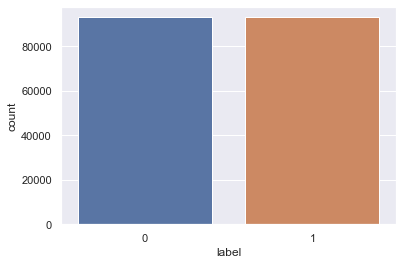

In [28]:
sns.countplot(y_train['label'])

We see that data is balanced now

***Lets create a loop that will execute all our models***

*-----------------------------* KNeighborsClassifier *------------------------------*


KNeighborsClassifier()


Accuracy_score =  0.7701186097139855


Cross_Val_Score =  0.886569813104827


roc_auc_score =  0.7278592492518667


classification_report
               precision    recall  f1-score   support

           0       0.34      0.67      0.45      7392
           1       0.94      0.79      0.85     45892

    accuracy                           0.77     53284
   macro avg       0.64      0.73      0.65     53284
weighted avg       0.85      0.77      0.80     53284



[[ 4948  2444]
 [ 9805 36087]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


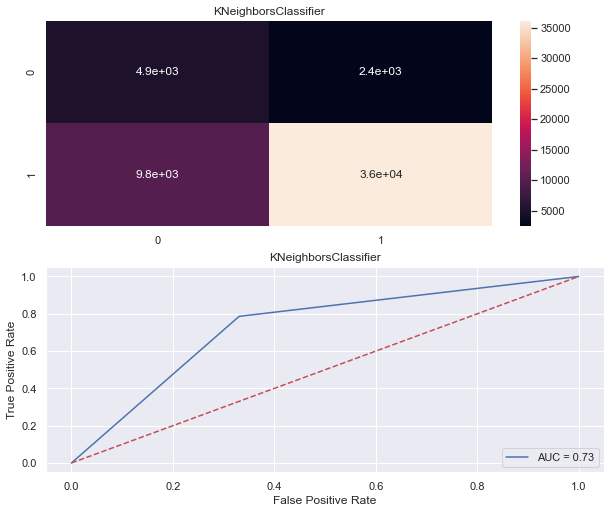




*-----------------------------* LogisticRegression *------------------------------*


LogisticRegression()


Accuracy_score =  0.7381953306808798


Cross_Val_Score =  0.8612764372932503


roc_auc_score =  0.7634618597286381


classification_report
               precision    recall  f1-score   support

           0       0.32      0.80      0.46      7392
           1       0.96      0.73      0.83     45892

    accuracy                           0.74     53284
   macro avg       0.64      0.76      0.64     53284
weighted avg       0.87      0.74      0.78     53284



[[ 5902  1490]
 [12460 33432]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


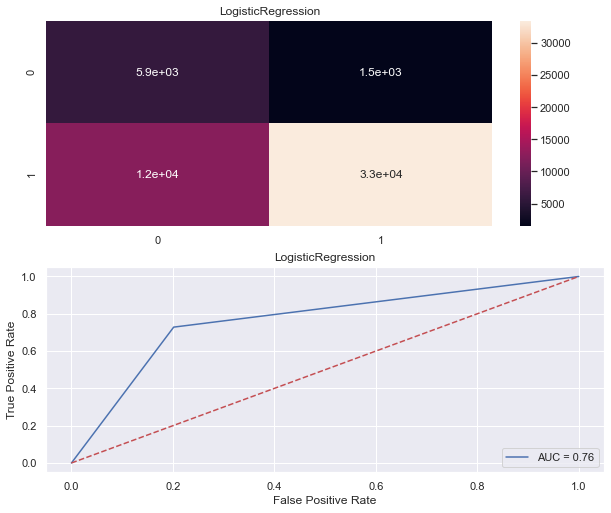




*-----------------------------* DecisionTreeClassifier *------------------------------*


DecisionTreeClassifier(random_state=56)


Accuracy_score =  0.8280346820809249


Cross_Val_Score =  0.8527730378270659


roc_auc_score =  0.7364001350997995


classification_report
               precision    recall  f1-score   support

           0       0.42      0.61      0.50      7392
           1       0.93      0.86      0.90     45892

    accuracy                           0.83     53284
   macro avg       0.67      0.74      0.70     53284
weighted avg       0.86      0.83      0.84     53284



[[ 4506  2886]
 [ 6277 39615]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


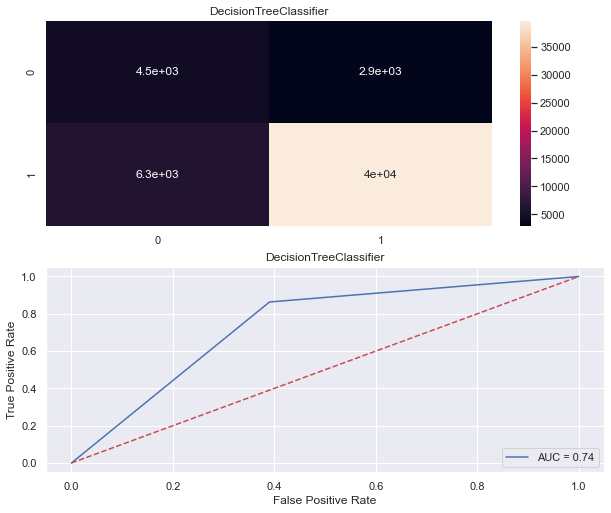




*-----------------------------* GaussianNB *------------------------------*


GaussianNB()


Accuracy_score =  0.6360633586067113


Cross_Val_Score =  0.6564828375887639


roc_auc_score =  0.7290250297800633


classification_report
               precision    recall  f1-score   support

           0       0.26      0.86      0.40      7392
           1       0.96      0.60      0.74     45892

    accuracy                           0.64     53284
   macro avg       0.61      0.73      0.57     53284
weighted avg       0.87      0.64      0.69     53284



[[ 6340  1052]
 [18340 27552]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


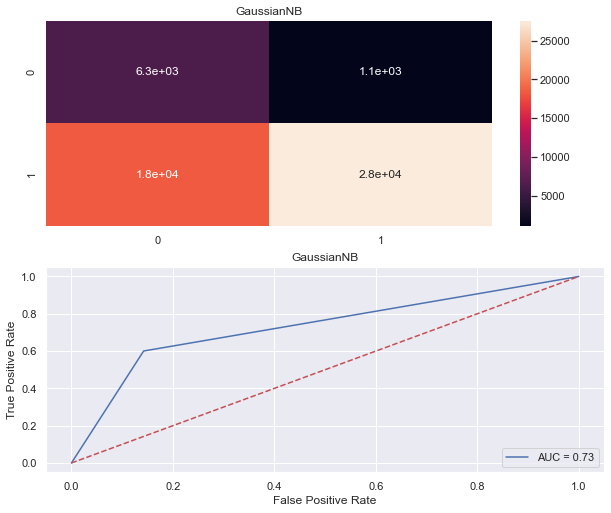




*-----------------------------* RandomForestClassifier *------------------------------*


RandomForestClassifier(n_estimators=200, random_state=56)


Accuracy_score =  0.8719878387508445


Cross_Val_Score =  0.8954138764629876


roc_auc_score =  0.7572066845347047


classification_report
               precision    recall  f1-score   support

           0       0.53      0.60      0.56      7392
           1       0.93      0.92      0.92     45892

    accuracy                           0.87     53284
   macro avg       0.73      0.76      0.74     53284
weighted avg       0.88      0.87      0.87     53284



[[ 4423  2969]
 [ 3852 42040]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


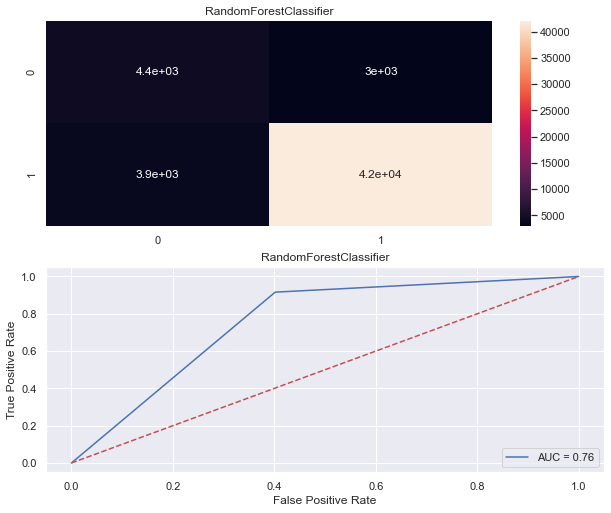




*-----------------------------* GradientBoostingClassifier *------------------------------*


GradientBoostingClassifier(n_estimators=200, random_state=56)


Accuracy_score =  0.8337399594625028


Cross_Val_Score =  0.9001641095020938


roc_auc_score =  0.7773345572213022


classification_report
               precision    recall  f1-score   support

           0       0.44      0.70      0.54      7392
           1       0.95      0.86      0.90     45892

    accuracy                           0.83     53284
   macro avg       0.69      0.78      0.72     53284
weighted avg       0.88      0.83      0.85     53284



[[ 5169  2223]
 [ 6636 39256]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


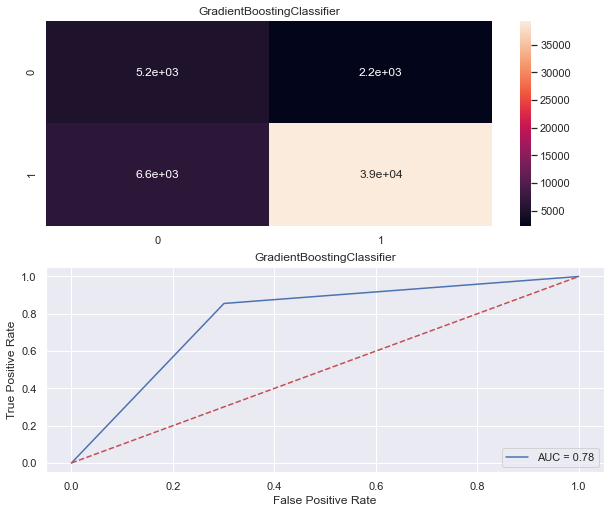




*-----------------------------* ExtraTreesClassifier *------------------------------*


ExtraTreesClassifier(random_state=56)


Accuracy_score =  0.8701674048494857


Cross_Val_Score =  0.8899142222156863


roc_auc_score =  0.7454249469769603


classification_report
               precision    recall  f1-score   support

           0       0.53      0.57      0.55      7392
           1       0.93      0.92      0.92     45892

    accuracy                           0.87     53284
   macro avg       0.73      0.75      0.74     53284
weighted avg       0.87      0.87      0.87     53284



[[ 4234  3158]
 [ 3760 42132]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


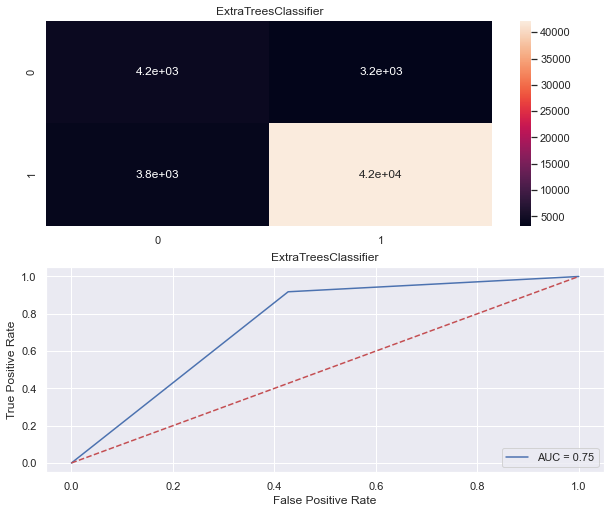




*-----------------------------* AdaBoostClassifier *------------------------------*


AdaBoostClassifier(random_state=56)


Accuracy_score =  0.7848697545229337


Cross_Val_Score =  0.8937912149885836


roc_auc_score =  0.7705269073767396


classification_report
               precision    recall  f1-score   support

           0       0.37      0.75      0.49      7392
           1       0.95      0.79      0.86     45892

    accuracy                           0.78     53284
   macro avg       0.66      0.77      0.68     53284
weighted avg       0.87      0.78      0.81     53284



[[ 5549  1843]
 [ 9620 36272]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


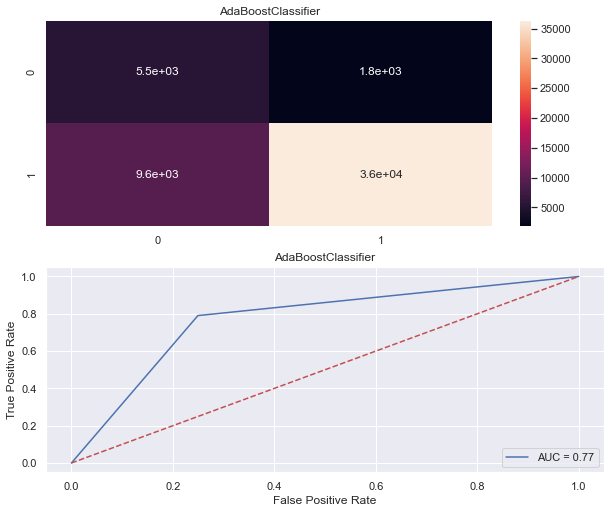

In [29]:
Model = []
score = []
cvs=[]
rocscore=[]
for name,model in models:
    print('*-----------------------------*',name,'*------------------------------*')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('Accuracy_score = ',AS)
    score.append(AS*100)
    print('\n')
    sc = cross_val_score(model, x, y, cv=10, scoring='accuracy').mean()
    print('Cross_Val_Score = ',sc)
    cvs.append(sc*100)
    print('\n')
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pre)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    print ('roc_auc_score = ',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('classification_report\n',classification_report(y_test,pre))
    print('\n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot(false_positive_rate, true_positive_rate, label='AUC = %0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    print('\n\n')

In [30]:
Final_R = pd.DataFrame({'Classification Model': Model, 'Accuracy Score': score ,'Cross_val_score':cvs,'Roc_auc_curve':rocscore})
Final_R

,Classification Model,Accuracy Score,Cross_val_score,Roc_auc_curve
0,KNeighborsClassifier,77.011861,88.656981,72.785925
1,LogisticRegression,73.819533,86.127644,76.346186
2,DecisionTreeClassifier,82.803468,85.277304,73.640014
3,GaussianNB,63.606336,65.648284,72.902503
4,RandomForestClassifier,87.198784,89.541388,75.720668
5,GradientBoostingClassifier,83.373996,90.016411,77.733456
6,ExtraTreesClassifier,87.016740,88.991422,74.542495
7,AdaBoostClassifier,78.486975,89.379121,77.052691


GradientBoostingClassifier seems to have better ROC AUC curve and better cross validation score even though accuracy score is bit less comparitively. Hence I am going to choose this as my final model

Tried to go grid search for the same model to make it more efficient but it took a long time and system wasn't compatible enoogh to continue, hence dropped the cell. Choosing the same model as final model.

<h2>End of Machine learning Process</h2>


<h1>Now lets save our final model</h1>

In [32]:
import joblib
joblib.dump(GBC,'Micro_credit_loan.pkl')

['Micro_credit_loan.pkl']

<img src='https://images.theconversation.com/files/201186/original/file-20180108-83585-9a60pr.jpg?ixlib=rb-1.1.0&q=45&auto=format&w=1200&h=1200.0&fit=crop' width=600>